In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd


Задание №1. Загрузить данные: ‘insurance.csv’. Вывести и провести предобработку.


In [2]:
df = pd.read_csv('insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [4]:
df.drop('smoker', axis = 'columns', inplace = True)
df.drop('age', axis = 'columns', inplace = True)
df.drop('charges', axis = 'columns', inplace = True)
df.drop('children', axis = 'columns', inplace = True)
df

,sex,bmi,region
0,female,27.900,southwest
1,male,33.770,southeast
2,male,33.000,southeast
3,male,22.705,northwest
4,male,28.880,northwest
...,...,...,...
1333,male,30.970,northwest
1334,female,31.920,northeast
1335,female,36.850,southeast
1336,female,25.800,southwest



Вывести список уникальных регионов.


In [5]:
pd.unique(df.region)

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)


Задание №2. Выполнить однофакторный ANOVA тест, чтобы проверить влияние региона на индекс массы тела (BMI), используя первый способ, через библиотеку Scipy.


In [6]:
groups = df.groupby('region').groups
groups

{'northeast': [8, 10, 16, 17, 20, 23, 26, 31, 38, 40, 44, 46, 50, 56, 60, 71, 78, 80, 81, 92, 98, 101, 102, 114, 115, 121, 123, 125, 130, 131, 134, 140, 141, 152, 153, 154, 157, 165, 169, 172, 179, 182, 185, 199, 205, 207, 209, 221, 228, 229, 240, 241, 244, 249, 250, 254, 255, 262, 267, 269, 273, 275, 280, 281, 282, 283, 286, 288, 291, 295, 300, 301, 308, 315, 317, 319, 321, 323, 325, 330, 333, 334, 338, 342, 343, 347, 353, 360, 365, 366, 369, 371, 372, 376, 380, 381, 384, 390, 392, 393, ...], 'northwest': [3, 4, 7, 9, 24, 27, 28, 33, 35, 36, 47, 51, 54, 55, 59, 62, 63, 64, 67, 75, 79, 83, 85, 86, 88, 89, 91, 93, 105, 107, 110, 113, 119, 122, 124, 128, 133, 137, 143, 144, 146, 148, 150, 155, 160, 164, 167, 168, 174, 176, 180, 183, 189, 193, 195, 198, 200, 202, 211, 212, 216, 230, 234, 238, 245, 256, 258, 259, 263, 272, 274, 276, 287, 298, 299, 305, 309, 316, 318, 320, 327, 331, 332, 337, 341, 349, 350, 357, 367, 368, 370, 375, 378, 387, 388, 389, 391, 395, 402, 403, ...], 'southeast': 

In [7]:
groups = df.groupby('region').groups
southwest = df.bmi[groups['southwest']]
southeast = df.bmi[groups['southeast']]
northwest = df.bmi[groups['northwest']]
northeast = df.bmi[groups['northeast']]

In [8]:
stats.f_oneway(southwest, southeast, northwest, northeast)

F_onewayResult(statistic=39.49505720170283, pvalue=1.881838913929143e-24)

Это означает, что фактор оказывает


Задание №3. Выполнить однофакторный ANOVA тест, чтобы проверить влияние региона на индекс массы тела (BMI), используя второй способ, с помощью функции anova_lm() из библиотеки statsmodels.


In [9]:
model = ols('bmi ~ region', data = df).fit()
anova_results = sm.stats.anova_lm(model, typ = 2)
print(anova_results)

                sum_sq      df          F        PR(>F)
region     4055.880631     3.0  39.495057  1.881839e-24
Residual  45664.319755  1334.0        NaN           NaN


ANOVA нашел различие, поскольку p-значение меньше 0,05. Это означает регион оказывает статистически значимое влияние на индекс массы тела


Задание №4. С помощью t критерия Стьюдента перебрать все пары. Определить поправку Бонферрони. Сделать выводы.


In [10]:
region = ['southwest', 'southeast', 'northwest', 'northeast']
region_pairs = []
alpha = 0.05
ben = alpha / 6

for i in range(3):
    for j in range(i + 1, 4):
        region_pairs.append((region[i], region[j]))

for i, j in region_pairs:
    pvalue = stats.ttest_ind(df.bmi[groups[i]], df.bmi[groups[j]]).pvalue
    gip = "принимается" if pvalue > ben else "отклоняется"
    print(f"Группы {i} - {j} pvalue: {pvalue}  {gip}")


# 6 пар 0.05 константа
print('\n', 'Поправка Бонферрони равна:', round(ben, 3), '\n')

Группы southwest - southeast pvalue: 5.4374009639680636e-09  отклоняется
Группы southwest - northwest pvalue: 0.001076958496307695  отклоняется
Группы southwest - northeast pvalue: 0.0019086161671573074  отклоняется
Группы southeast - northwest pvalue: 2.643571405230106e-19  отклоняется
Группы southeast - northeast pvalue: 1.186014937424813e-17  отклоняется
Группы northwest - northeast pvalue: 0.951929170821864  принимается

 Поправка Бонферрони равна: 0.008 




Задание №5. Выполнить пост-хок тесты Тьюки и построить график.


   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
  group1    group2  meandiff p-adj   lower   upper  reject
----------------------------------------------------------
northeast northwest   0.0263 0.9999 -1.1552  1.2078  False
northeast southeast   4.1825    0.0   3.033   5.332   True
northeast southwest   1.4231 0.0107  0.2416  2.6046   True
northwest southeast   4.1562    0.0  3.0077  5.3047   True
northwest southwest   1.3968 0.0127  0.2162  2.5774   True
southeast southwest  -2.7594    0.0 -3.9079 -1.6108   True
----------------------------------------------------------


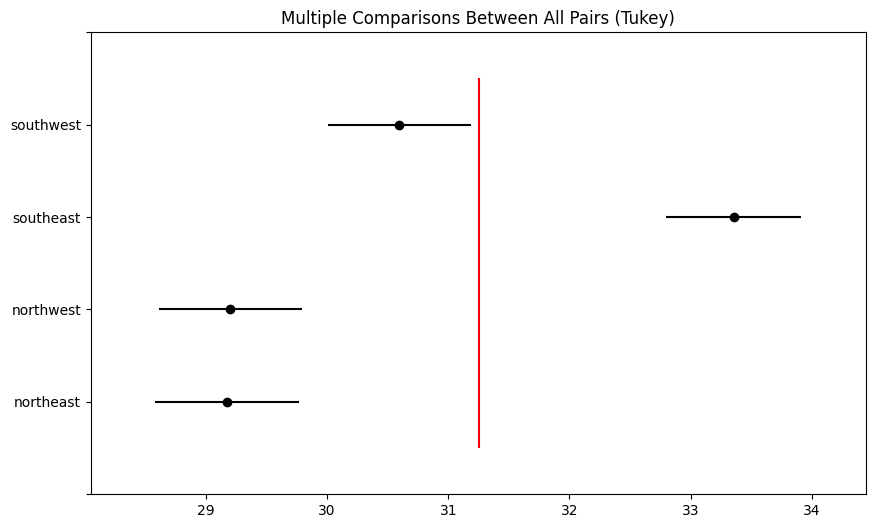

In [11]:
tukey = pairwise_tukeyhsd(endog = df.bmi, groups = df.region, alpha = 0.05)
tukey.plot_simultaneous()
plt.vlines(x = 31.25, ymin = -0.5, ymax = 3.5, color = 'red')
print(tukey.summary())


Задание №6. Выполнить двухфакторный ANOVA тест, чтобы проверить влияние региона и пола на индекс массы тела (BMI), используя функцию anova_lm() из библиотеки statsmodels.


In [12]:
model = ols('bmi ~ C(region) + C(sex) + C(region):C(sex)', data = df).fit()
print(sm.stats.anova_lm(model, type = 2))
print(1.126940e-01 > 0.05)

                      df        sum_sq      mean_sq          F        PR(>F)
C(region)            3.0   4055.880631  1351.960210  39.602259  1.636858e-24
C(sex)               1.0     86.007035    86.007035   2.519359  1.126940e-01
C(region):C(sex)     3.0    174.157808    58.052603   1.700504  1.650655e-01
Residual          1330.0  45404.154911    34.138462        NaN           NaN
True


Поскольку p-значения для региона меньше 0,05 говорит нам об отсутствии значительного эффекта
Поскольку p-значения для региона больше 0,05 говорит нам о наличие значительного эффекта
C(region):C(sex) не менее 0,05, это говорит нам об отсутствии значительного эффекта взаимодействия между


Задание №7. Выполнить пост-хок тесты Тьюки и построить график.


            Multiple Comparison of Means - Tukey HSD, FWER=0.05             
      group1             group2       meandiff p-adj   lower   upper  reject
----------------------------------------------------------------------------
female / northeast female / northwest  -0.0464    1.0 -2.0142  1.9215  False
female / northeast female / southeast   3.3469    0.0    1.41  5.2839   True
female / northeast female / southwest   0.7362 0.9497 -1.2377    2.71  False
female / northeast   male / northeast  -0.2998 0.9998 -2.2706  1.6711  False
female / northeast   male / northwest  -0.2042    1.0 -2.1811  1.7728  False
female / northeast   male / southeast   4.6657    0.0  2.7634   6.568   True
female / northeast   male / southwest   1.8051 0.1007 -0.1657   3.776  False
female / northwest female / southeast   3.3933    0.0  1.4656   5.321   True
female / northwest female / southwest   0.7825 0.9294 -1.1822  2.7473  False
female / northwest   male / northeast  -0.2534 0.9999 -2.2152  1.7083  False

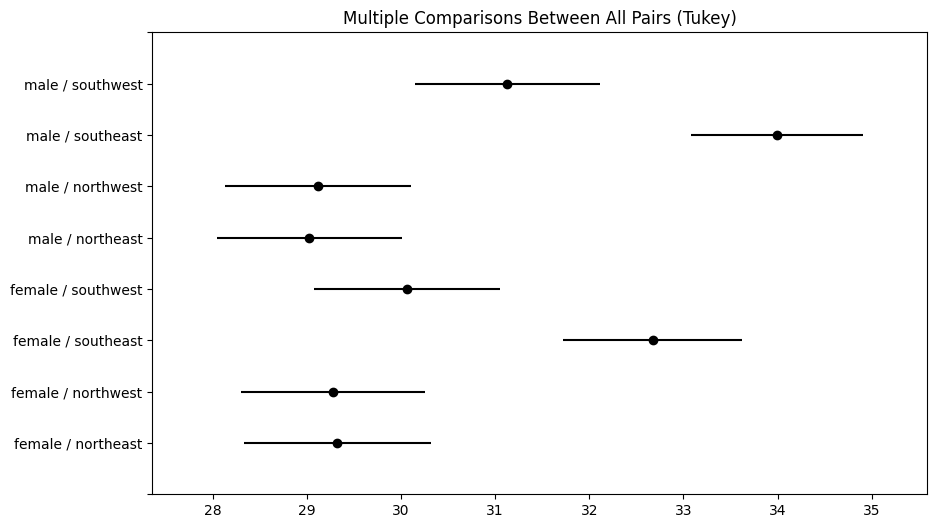

In [13]:
df['combination'] = df.sex + ' / ' + df.region
tukey = pairwise_tukeyhsd(endog = df.bmi, groups = df.combination, alpha = 0.05)
tukey.plot_simultaneous()
plt.vlines(x = 0, ymin = -0.5, ymax = 7.5, color = 'red')
print(tukey.summary())